<div style="border:solid #eaeaea 2px; padding: 15px">
Hello, My name is Guy and in this project we are going to go through prioritizing our Hypotheses
and we analyze out test and control groups.<br>
We will make conclusions and decide wether the test group improved or declined against the control group and decide wether we need to continue the testing or not.
    </div>

<div style="border:solid #eaeaea 2px; padding: 40px">
<font style="font-size:30px";color='#000000'>Making Business Decisions Based on Data</font>  
    
### Prioritizing Hypotheses
* <a href=#1 style="color:black">Apply the ICE framework to prioritize hypotheses.</a>
* <a href=#2 style="color:black">Apply the RICE framework to prioritize hypotheses.</a>
* <a href=#3 style="color:black">Show how the prioritization of hypotheses changes when you use RICE instead of ICE.</a>
### A/B Testing & Analysis
* <a href=#4 style="color:black">Graph cumulative revenue by group.</a>
* <a href=#5 style="color:black">Graph cumulative average order size by group.</a>
* <a href=#6 style="color:black">Graph the relative difference in cumulative average order size for group B compared with group </a>A.
* <a href=#7 style="color:black">Calculate each group's conversion rate as the ratio of orders to the number of visits for each </a>day.
* <a href=#8 style="color:black">Plot a scatter chart of the number of orders per user.</a>
* <a href=#9 style="color:black">Calculate the 95th and 99th percentiles for the number of orders per user.</a>
* <a href=#10 style="color:black">Plot a scatter chart of order prices.</a>
* <a href=#11 style="color:black">Calculate the 95th and 99th percentiles of order prices.</a>
* <a href=#12 style="color:black">Find the statistical significance of the difference in conversion between the groups using the </a>raw data.
* <a href=#13 style="color:black">Find the statistical significance of the difference in average order size between the groups </a>using the raw data.
* <a href=#14 style="color:black">Find the statistical significance of the difference in conversion between the groups using the </a>filtered data.
* <a href=#15 style="color:black">Find the statistical significance of the difference in average order size between the groups </a>using the filtered data.
* <a href=#16 style="color:black">Make a decision based on the test results.</a>
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import re
from IPython.display import display, HTML
from IPython.display import display_html
import matplotlib as mpl
import plotly.express as px
import warnings
from pylab import rcParams
import datetime as dt
from pylab import *
%matplotlib inline
warnings.filterwarnings("ignore")
rcParams['figure.figsize'] = 10,5
rcParams['font.size'] = 30
sns.set()
np.random.seed(8)

warnings.filterwarnings("ignore")
pd.set_option('display.max_colwidth', -1)

In [2]:
def CheckNulls(df):
    for data in df:
        display('Nulls:', data[data.columns[data.isnull().any()]].isnull().sum() * 100 / data.shape[0])
        display(data.info())
        display(data.describe())
        display(data.duplicated().sum())
        print('--------------------')
        
        
def display_side_by_side(dfs:list, captions:list):
    output = ""
    combined = dict(zip(captions, dfs))
    for caption, df in combined.items():
        output += df.style.set_table_attributes("style='display:inline'").set_caption(caption)._repr_html_()
        output += "\xa0\xa0\xa0"
    display(HTML(output))


In [3]:
hypotheses = pd.read_csv('./hypotheses_us.csv', sep=';')
orders = pd.read_csv('./orders_us.csv')
visits = pd.read_csv('./visits_us.csv')

In [4]:
CheckNulls([orders, visits,hypotheses])

'Nulls:'

Series([], dtype: float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1197 entries, 0 to 1196
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   transactionId  1197 non-null   int64  
 1   visitorId      1197 non-null   int64  
 2   date           1197 non-null   object 
 3   revenue        1197 non-null   float64
 4   group          1197 non-null   object 
dtypes: float64(1), int64(2), object(2)
memory usage: 37.5+ KB


None

,transactionId,visitorId,revenue
count,1.197000e+03,1.197000e+03,1197.000000
mean,2.155621e+09,2.165960e+09,131.491646
std,1.229085e+09,1.236014e+09,603.004729
min,1.062393e+06,5.114589e+06,5.000000
25%,1.166776e+09,1.111826e+09,20.800000
50%,2.145194e+09,2.217985e+09,50.200000
75%,3.237740e+09,3.177606e+09,130.400000
max,4.293856e+09,4.283872e+09,19920.400000


0

--------------------


'Nulls:'

Series([], dtype: float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    62 non-null     object
 1   group   62 non-null     object
 2   visits  62 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ KB


None

,visits
count,62.000000
mean,607.290323
std,114.400560
min,361.000000
25%,534.000000
50%,624.500000
75%,710.500000
max,770.000000


0

--------------------


'Nulls:'

Series([], dtype: float64)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Hypothesis  9 non-null      object
 1   Reach       9 non-null      int64 
 2   Impact      9 non-null      int64 
 3   Confidence  9 non-null      int64 
 4   Effort      9 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 388.0+ bytes


None

,Reach,Impact,Confidence,Effort
count,9.000000,9.000000,9.000000,9.000000
mean,4.777778,4.777778,5.555556,4.888889
std,3.153481,3.192874,3.045944,2.803767
min,1.000000,1.000000,1.000000,1.000000
25%,3.000000,3.000000,3.000000,3.000000
50%,3.000000,3.000000,7.000000,5.000000
75%,8.000000,7.000000,8.000000,6.000000
max,10.000000,10.000000,9.000000,10.000000


0

--------------------


In [5]:
orders['date'] = orders['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))
visits['date'] = visits['date'].map(lambda x: dt.datetime.strptime(x, '%Y-%m-%d'))

In [6]:
hypotheses.columns = hypotheses.columns.str.lower()

In [7]:
orders_duplicate = orders.groupby('visitorId')['group'].nunique().reset_index()
orders_duplicate = orders_duplicate[orders_duplicate['group'] > 1]
orders_duplicate.head()

,visitorId,group
2,8300375,2
44,199603092,2
51,232979603,2
55,237748145,2
66,276558944,2


In [8]:
orders =  orders[np.logical_not(orders.visitorId.isin(orders_duplicate.visitorId))]

In [9]:
orders.head()

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B


<div style="border:solid #eaeaea 2px; padding: 15px">
We checked if every user is in only one group, and found out some of data has been in both groups. those users are removed since we dont know where they really belong.
</div>

<a id="1"></a>

In [10]:
hypotheses['ICE'] = (hypotheses['impact'] * hypotheses['confidence'])/ hypotheses['effort']

In [11]:
hypotheses[['hypothesis','ICE']].sort_values(by='ICE',ascending=False)

,hypothesis,ICE
8,Launch a promotion that gives users discounts on their birthdays,16.200000
0,Add two new channels for attracting traffic. This will bring 30% more users,13.333333
7,Add a subscription form to all the main pages. This will help you compile a mailing list,11.200000
6,Show banners with current offers and sales on the main page. This will boost conversion,8.000000
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,7.000000
1,Launch your own delivery service. This will shorten delivery time,2.000000
5,Add a customer review page. This will increase the number of orders,1.333333
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,1.125000
4,Change the background color on the main page. This will increase user engagement,1.000000


<a id=2></a>

In [12]:
hypotheses['RICE'] = (hypotheses['reach'] * hypotheses['impact'] * hypotheses['confidence']) / hypotheses['effort']

In [13]:
hypotheses.sort_values(by='RICE',ascending=False)

,hypothesis,reach,impact,confidence,effort,ICE,RICE
7,Add a subscription form to all the main pages. This will help you compile a mailing list,10,7,8,5,11.200000,112.0
2,Add product recommendation blocks to the store's site. This will increase conversion and average purchase size,8,3,7,3,7.000000,56.0
0,Add two new channels for attracting traffic. This will bring 30% more users,3,10,8,6,13.333333,40.0
6,Show banners with current offers and sales on the main page. This will boost conversion,5,3,8,3,8.000000,40.0
8,Launch a promotion that gives users discounts on their birthdays,1,9,9,5,16.200000,16.2
3,Change the category structure. This will increase conversion since users will find the products they want more quickly,8,3,3,8,1.125000,9.0
1,Launch your own delivery service. This will shorten delivery time,2,5,4,10,2.000000,4.0
5,Add a customer review page. This will increase the number of orders,3,2,2,3,1.333333,4.0
4,Change the background color on the main page. This will increase user engagement,3,1,1,1,1.000000,3.0


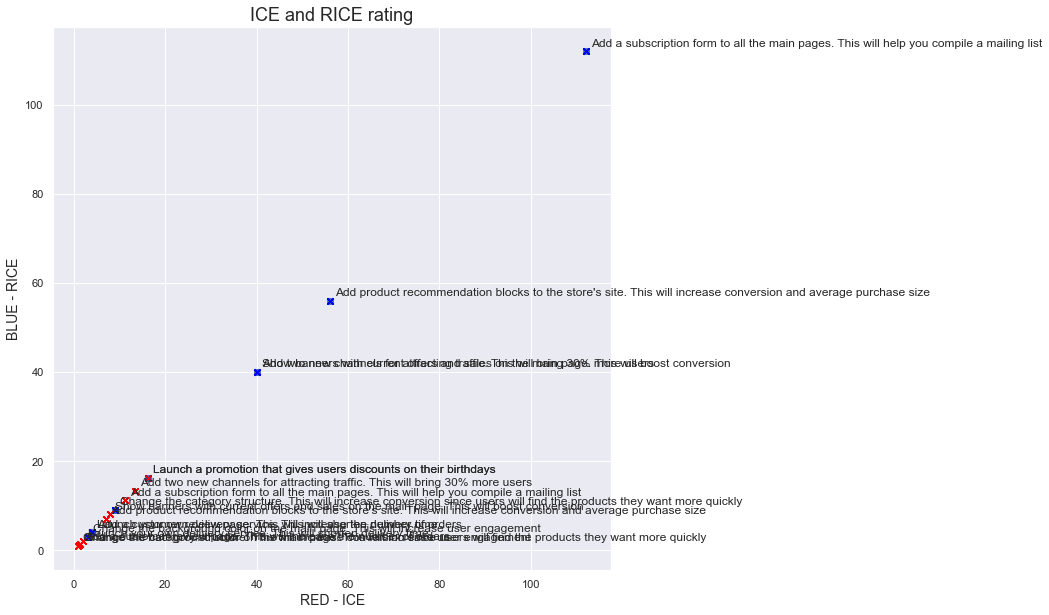

In [14]:
x1 = hypotheses['ICE'].values
y1 = hypotheses['ICE'].values

x = hypotheses['RICE'].values
y = hypotheses['RICE'].values
types = hypotheses['hypothesis'].values

fig, ax = plt.subplots(figsize=(10,10))
ax.scatter(x, y)

ax.set_xlabel('RED - ICE', fontsize=14)
ax.set_ylabel('BLUE - RICE', fontsize=14)
ax.set_title('ICE and RICE rating', fontsize=18)
for i, txt in enumerate(types):
    ax.annotate(txt, (x[i], y[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(x, y, marker='x', color='blue')
    ax.annotate(txt, (x1[i], y1[i]), xytext=(5,5), textcoords='offset points')
    plt.scatter(x1, y1, marker='x', color='red')

<a id=3></a>
<div style="border:solid #eaeaea 2px; padding: 15px">
Our top four hypotheses in the ICE rank are : 8, 0, 7 and 6.  
In the RICE rank we got - 7, 2, 0 and 6.

The reason for that change is the "Reach" factor which accounts for how many users it will reach.  
hypotheses number 7,0 and 6 are in the four leading in rank in both ICE and RICE.
</div>

In [15]:
display_side_by_side([orders.head(10), visits.head(10)],['Orders','Visits'])

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15 00:00:00,30.400000,B
1,2804400009,3642806036,2019-08-15 00:00:00,15.200000,B
3,3797467345,1196621759,2019-08-15 00:00:00,155.100000,B
4,2282983706,2322279887,2019-08-15 00:00:00,40.500000,B
5,182168103,935554773,2019-08-15 00:00:00,35.000000,B
6,398296753,2900797465,2019-08-15 00:00:00,30.600000,B
7,2626614568,78758296,2019-08-15 00:00:00,20.100000,A
8,1576988021,295230930,2019-08-15 00:00:00,215.900000,A
9,1506739906,1882260405,2019-08-15 00:00:00,30.500000,B
10,3649131742,879864040,2019-08-15 00:00:00,65.700000,A


In [16]:
datesGroups = orders[['date','group']].drop_duplicates()
datesGroups.head()

,date,group
0,2019-08-15,B
7,2019-08-15,A
45,2019-08-16,A
47,2019-08-16,B
55,2019-08-01,A


In [17]:
orders

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,30.4,B
1,2804400009,3642806036,2019-08-15,15.2,B
3,3797467345,1196621759,2019-08-15,155.1,B
4,2282983706,2322279887,2019-08-15,40.5,B
5,182168103,935554773,2019-08-15,35.0,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,255.7,B
1192,2662137336,3733762160,2019-08-14,100.8,B
1193,2203539145,370388673,2019-08-14,50.1,A
1194,1807773912,573423106,2019-08-14,165.3,A


In [18]:
ordersAggregated = datesGroups.apply(lambda x: orders[np.logical_and(orders['date'] <= x['date'], orders['group'] == x['group'])]
                                     .agg({'date':'max', 'group':'max', 'transactionId':'nunique','visitorId':'nunique', 'revenue':'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])
visitsAggregated = datesGroups.apply(lambda x: visits[np.logical_and(visits['date'] <= x['date'], visits['group'] == x['group'])]
                                     .agg({'date':'max', 'group':'max', 'visits':'sum'}), axis=1)\
                                     .sort_values(by=['date','group'])

In [19]:
display_side_by_side([ordersAggregated.head(15), visitsAggregated.head(15)],['Orders agg','Visits agg'])

,date,group,transactionId,visitorId,revenue
55,2019-08-01 00:00:00,A,23,19,2266.600000
66,2019-08-01 00:00:00,B,17,17,967.200000
175,2019-08-02 00:00:00,A,42,36,3734.900000
173,2019-08-02 00:00:00,B,40,39,3535.300000
291,2019-08-03 00:00:00,A,66,60,5550.100000
383,2019-08-03 00:00:00,B,54,53,4606.900000
499,2019-08-04 00:00:00,A,77,71,6225.600000
498,2019-08-04 00:00:00,B,68,66,6138.500000
719,2019-08-05 00:00:00,A,99,92,7623.600000
699,2019-08-05 00:00:00,B,89,87,7587.800000


In [20]:
cumulativeData = ordersAggregated.merge(visitsAggregated, left_on=['date','group'], right_on=['date','group'])
cumulativeData.columns = ['date','group','orders','buyers', 'revenue','visits']
cumulativeData.head(10)

,date,group,orders,buyers,revenue,visits
0,2019-08-01,A,23,19,2266.6,719
1,2019-08-01,B,17,17,967.2,713
2,2019-08-02,A,42,36,3734.9,1338
3,2019-08-02,B,40,39,3535.3,1294
4,2019-08-03,A,66,60,5550.1,1845
5,2019-08-03,B,54,53,4606.9,1803
6,2019-08-04,A,77,71,6225.6,2562
7,2019-08-04,B,68,66,6138.5,2573
8,2019-08-05,A,99,92,7623.6,3318
9,2019-08-05,B,89,87,7587.8,3280


In [21]:
cumulativeRevenueA = cumulativeData[cumulativeData['group']=='A'][['date','revenue','orders']]
cumulativeRevenueB = cumulativeData[cumulativeData['group']=='B'][['date','revenue','orders']]
display_side_by_side([cumulativeRevenueA.head(10), cumulativeRevenueB.head(10)],['A','B'])

,date,revenue,orders
0,2019-08-01 00:00:00,2266.600000,23
2,2019-08-02 00:00:00,3734.900000,42
4,2019-08-03 00:00:00,5550.100000,66
6,2019-08-04 00:00:00,6225.600000,77
8,2019-08-05 00:00:00,7623.600000,99
10,2019-08-06 00:00:00,8292.000000,114
12,2019-08-07 00:00:00,10234.000000,130
14,2019-08-08 00:00:00,11638.800000,144
16,2019-08-09 00:00:00,13734.000000,155
18,2019-08-10 00:00:00,16121.500000,170


<a id=4></a>

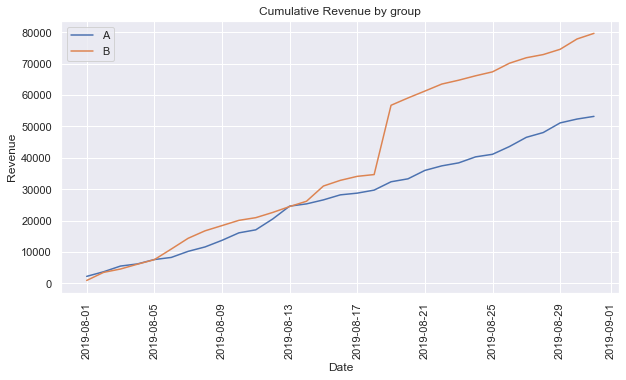

In [22]:
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue'], label='B')
plt.title('Cumulative Revenue by group')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Revenue')
plt.legend();

<div style="border:solid #eaeaea 2px; padding: 15px">
First we can notice that we have an ongoing rise in revenue which is a good thing,
we also can spot that both groups start quite equally and then group B takes the lead for the whole journy.
Group B also shows a big spike halfway august, probably due to outliers in order quantity or buying price.
Group A has as spike at the end of second week of august probably for the same reason.
Both groups get steady near the end of the test altough still rising.
</div>

<a id=5></a>

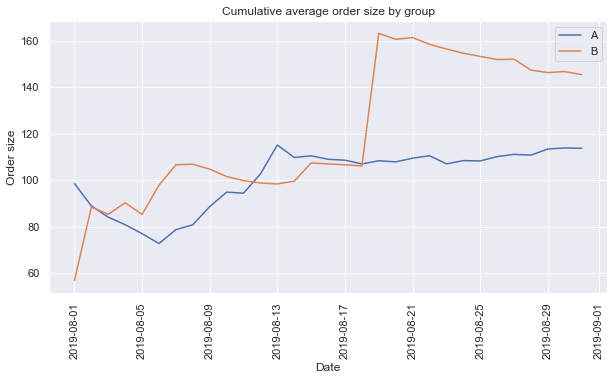

In [23]:
plt.plot(cumulativeRevenueA['date'],cumulativeRevenueA['revenue']/cumulativeRevenueA['orders'], label='A')
plt.plot(cumulativeRevenueB['date'],cumulativeRevenueB['revenue']/cumulativeRevenueB['orders'], label='B')
plt.title('Cumulative average order size by group')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Order size')
plt.legend();

<div style="border:solid #eaeaea 2px; padding: 15px">
Here we can spot that the spikes are bigger altohugh both stabilise at the end with group B once again leading.
The surges both for Group A and B are probalby due to high and unusual order sizes.
</div>

In [24]:
mergedCumulativeRevenue = cumulativeRevenueA.merge(cumulativeRevenueB,left_on='date',right_on='date', how='left',suffixes=['A','B'])

<a id=6></a>

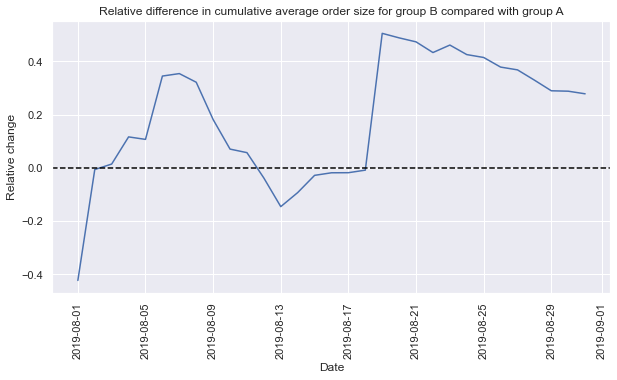

In [25]:
plt.plot(mergedCumulativeRevenue['date'], (mergedCumulativeRevenue['revenueB']/mergedCumulativeRevenue['ordersB'])/(mergedCumulativeRevenue['revenueA']/mergedCumulativeRevenue['ordersA'])-1)
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Relative difference in cumulative average order size for group B compared with group A')
plt.xticks(rotation=90)
plt.xlabel('Date')
plt.ylabel('Relative change');

<div style="border:solid #eaeaea 2px; padding: 15px">
Our graph spikes at certain points, probably again due to outliers.  
Once again we can see a spike in the middle of August month.
</div>

In [26]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

In [27]:
cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

mergedCumulativeConversions = cumulativeDataA[['date','conversion']].merge(cumulativeDataB[['date','conversion']], left_on='date', right_on='date', how='left', suffixes=['A', 'B'])

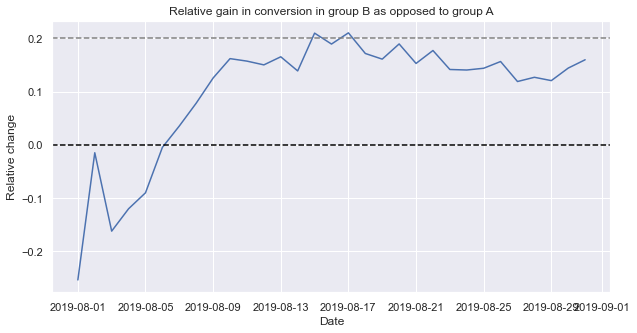

In [28]:
plt.plot(mergedCumulativeConversions['date'], mergedCumulativeConversions['conversionB']/mergedCumulativeConversions['conversionA']-1)
plt.title('Relative gain in conversion in group B as opposed to group A')
plt.axhline(y=0, color='black', linestyle='--')
plt.axhline(y= 0.2, color='grey', linestyle='--')
#plt.axis(["2019-08-01", '2019-09-01', -0.5, 0.5])
plt.xlabel('Date')
plt.ylabel('Relative change');

<div style="border:solid #eaeaea 2px; padding: 15px">
We can see a rise and then the graph stabilises at the end with a potential to rise again
</div>

<a id=7></a>

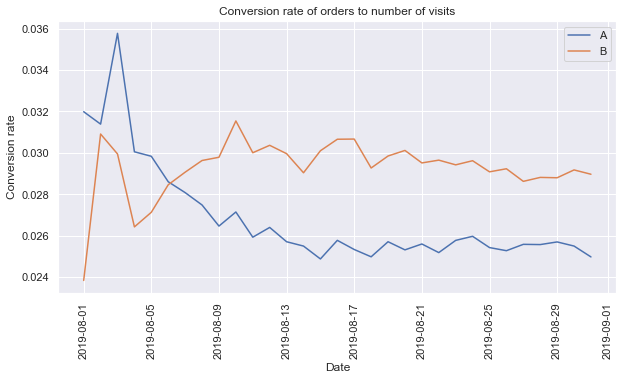

In [29]:
cumulativeData['conversion'] = cumulativeData['orders']/cumulativeData['visits']

cumulativeDataA = cumulativeData[cumulativeData['group']=='A']
cumulativeDataB = cumulativeData[cumulativeData['group']=='B']

plt.plot(cumulativeDataA['date'], cumulativeDataA['conversion'], label='A')
plt.plot(cumulativeDataB['date'], cumulativeDataB['conversion'], label='B')
plt.title('Conversion rate of orders to number of visits')
plt.xticks(rotation=90)
plt.legend()
plt.xlabel('Date')
plt.ylabel('Conversion rate');

<div style="border:solid #eaeaea 2px; padding: 15px">
At the start of the month Group A started relatively higher than group B, after a couple of days the rate changed in favour of group B.  
After that the graph pretty much stabilizes towrads the end of the month.
</div>

In [30]:
ordersByUsers = orders.drop(['revenue', 'date'], axis=1).groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique,'group':'min'})
ordersByUsers.columns = ['visitorId','orders','group']

<a id=8></a>

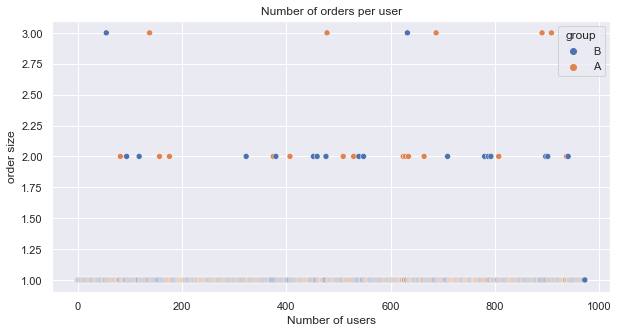

In [31]:
x_values = pd.Series(range(0,len(ordersByUsers)))
sns.scatterplot(x=x_values, y='orders',hue='group',data=ordersByUsers)
plt.title('Number of orders per user')
plt.xlabel('Number of users')
plt.ylabel('order size');

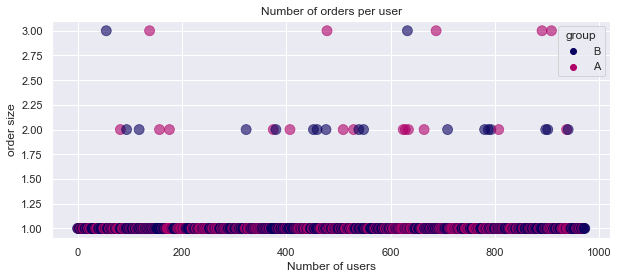

In [32]:
## Reviewer's code  v2
# takes colors from here: https://colorhunt.co/
x_values = pd.Series(range(0,len(ordersByUsers)))
plt.figure(figsize=(10, 4))
sns.scatterplot(x=x_values, y='orders',hue='group',data=ordersByUsers, alpha=0.6, s=100, 
                palette=['#09015f', '#af0069'], edgecolor=None)
plt.title('Number of orders per user')
plt.xlabel('Number of users')
plt.ylabel('order size')
plt.show()

<div style="border:solid #eaeaea 2px; padding: 15px">
majority of users order between 1 - 2 orders in our time priod, we also have some distinct users who order 3 times.  
    
The most rare cases are 3 , which we would conside an outlier here, in the next step well find exactly what is considered an anomaly.
</div>

<a id=9></a>

In [33]:
print(np.percentile(ordersByUsers['orders'], [90, 95, 99]))

[1. 1. 2.]


<div style="border:solid #eaeaea 2px; padding: 15px">
Seems that no more than 1% order 2 orders or possibly more, so it would be reasonable to set the accepted limit at up to 2 orders per user.
</div>

<a id=10></a>

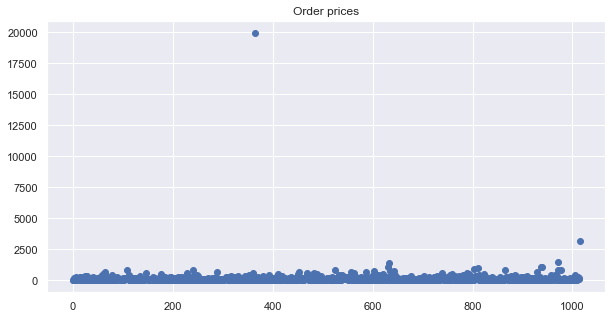

In [34]:
x_values = pd.Series(range(0,len(orders['revenue'])))
plt.scatter(x_values, orders['revenue'])
plt.subplot()
plt.title('Order prices');

<div style="border:solid #eaeaea 2px; padding: 15px">
Seems like most orders go from 0 to about 1000. lets check the perecntiles.
</div>

<a id=11></a>

In [35]:
print(np.percentile(orders['revenue'], [90, 95, 99]))

[280.8   414.275 830.3  ]


<div style="border:solid #eaeaea 2px; padding: 15px">
So only 1% gets to 830 in order price, our 5% is the better bet so we will take 500 as a limit. everythin above that is an anomaly.
</div>

<a id=12></a>

<div style="border:solid #eaeaea 2px; padding: 15px">
H0 - The groups conversion rates differences are <b>NOT</b> statistically significant.<n>
    
H1 - The groups conversion rates differences <b>ARE</b> statistically significant 
    
Alpha = 0.05</div>

In [36]:
ordersByUsersA = orders[orders['group']=='A'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersA.columns = ['visitorId', 'orders']

ordersByUsersB = orders[orders['group']=='B'].groupby('visitorId', as_index=False).agg({'transactionId' : pd.Series.nunique})
ordersByUsersB.columns = ['visitorId', 'orders'] 

sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)

sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-Value: {0:.3f}".format(stats.mannwhitneyu(sampleA, sampleB)[1]))

print("Relative conversion gain for group B compared with group A: {0:.3f}".format(sampleB.mean()/sampleA.mean()-1)) 



P-Value: 0.006
Relative conversion gain for group B compared with group A: 0.160


<div style="border:solid #eaeaea 2px; padding: 15px">
The P-values is significally lower than 0.05 which means we reject the Null Hypothesis.  
The raw data analysis shows that the groups conversion rates differences are statistically significant.
We can also see that the realtive conversion gain for group B compared to group A is 16%.
</div>

<a id=13></a>

<div style="border:solid #eaeaea 2px; padding: 15px">
H0 - The groups conversion rates differences are <b>NOT</b> statistically significant.<n>
    
H1 - The groups conversion rates differences <b>ARE</b> statistically significant 
    
Alpha = 0.05</div>

In [37]:
sampleA = pd.concat([ordersByUsersA['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])), name='orders')],axis=0)
sampleB = pd.concat([ordersByUsersB['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])), name='orders')],axis=0)

print("P-Value: {0:.3f}".format(stats.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])[1]))
print("Relative difference for group B compared with group A: {0:.3f}".format(orders[orders['group']=='B']['revenue'].mean()/orders[orders['group']=='A']['revenue'].mean()-1)) 

P-Value: 0.431
Relative difference for group B compared with group A: 0.278


<div style="border:solid #eaeaea 2px; padding: 15px">
The P-value is greater than 0.05 so there are no statistically significant differences between the groups average order sizes.
However, the relative difference is 27.8% which is pretty big, but not significant. lets see if those are caused by anomalies.
</div>

<a id=14></a>

In [38]:
usersWithManyOrders = pd.concat([ordersByUsersA[ordersByUsersA['orders'] > 2]['visitorId'], ordersByUsersB[ordersByUsersB['orders'] > 2]['visitorId']], axis = 0)
usersWithExpensiveOrders = orders[orders['revenue'] > 500]['visitorId']

abnormalUsers = pd.concat([usersWithManyOrders, usersWithExpensiveOrders], axis = 0).drop_duplicates().sort_values()
abnormalUsers.head()

1099    148427295
928     204675465
33      249864742
684     358944393
648     382846391
Name: visitorId, dtype: int64

<div style="border:solid #eaeaea 2px; padding: 15px">
H0 - The groups conversion rates differences are <b>NOT</b> statistically significant.<n>
    
H1 - The groups conversion rates differences <b>ARE</b> statistically significant 
    
Alpha = 0.05</div>

In [39]:
sampleAFiltered = pd.concat([ordersByUsersA[np.logical_not(ordersByUsersA['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='A']['visits'].sum() - len(ordersByUsersA['orders'])),name='orders')],axis=0)

sampleBFiltered = pd.concat([ordersByUsersB[np.logical_not(ordersByUsersB['visitorId'].isin(abnormalUsers))]['orders'],pd.Series(0, index=np.arange(visits[visits['group']=='B']['visits'].sum() - len(ordersByUsersB['orders'])),name='orders')],axis=0) 

print("P-value: {0:.5f}".format(stats.mannwhitneyu(sampleAFiltered, sampleBFiltered)[1]))
print("Relative conversion gain for group B compared with group A: {0:.3f}".format(sampleBFiltered.mean()/sampleAFiltered.mean()-1)) 

P-value: 0.00373
Relative conversion gain for group B compared with group A: 0.193


<div style="border:solid #eaeaea 2px; padding: 15px">
Seems like the the distance grew slightly between the raw and filtered data,
It is still significantly different and we can see that segment B is much better than A with a relative change that grew to 19.3%.
</div>

<a id=15></a>

<div style="border:solid #eaeaea 2px; padding: 15px">
H0 - The groups conversion rates differences are <b>NOT</b> statistically significant.<n>
    
H1 - The groups conversion rates differences <b>ARE</b> statistically significant 
    
Alpha = 0.05</div>

In [40]:
print("{0:.3f}".format(stats.mannwhitneyu(
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'],
    orders[np.logical_and(
        orders['group']=='B',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'])[1]))

print("{0:.3f}".format(
    orders[np.logical_and(orders['group']=='B',np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean()/
    orders[np.logical_and(
        orders['group']=='A',
        np.logical_not(orders['visitorId'].isin(abnormalUsers)))]['revenue'].mean() - 1)) 

0.444
-0.001


<div style="border:solid #eaeaea 2px; padding: 15px">
Here we can see that even after filtering the data, we arrived to the conclusion that the difference is not statistically significant, with a variance change of 0.1% which now looks more normal after the filtering we did, but still not significant.
</div>

<a id=16></a>

<div style="border:solid #71e8d8 2px; padding: 15px">
<font style="font-size:30px";color='#000000'>Conclusion</font> 

If we conclude all of the outcomes from our analasys:
Framework usage - we saw that the the RICE framework is of better accuracy due to it having an extra parameter to account for.
P-values and relative changes :   
    
Raw conversion between groups- <code style="background:#669cd6;color:black">P-value - 0.006</code>, <code style="background:#d4ef39;color:black">relative change - 16%</code> - <code style="background:#00ff6a;color:black">statistically significant.</code>  
Raw difference in order size - <code style="background:#669cd6;color:black">P-value - 0.431</code>,  <code style="background:#d4ef39;color:black">relative change - 27.8%</code> - <code style="background:#ce3d3d;color:black">not statistically significant.</code>  
Filtered conversion between groups- <code style="background:#669cd6;color:black">P-value - 0.00373</code>,  <code style="background:#d4ef39;color:black">relative change - 19.3%</code> - <code style="background:#00ff6a;color:black">statistically significant.</code>  
Filtered difference in order size - <code style="background:#669cd6;color:black">P-value - 0.444</code>,  <code style="background:#d4ef39;color:black">relative change - 0.1%</code> - <code style="background:#ce3d3d;color:black">not statistically significant.</code>  
    
We can see that after filtering the data the Conversion became slightly higher (thus more accurate) and the relative change grew by 4% between the groups.  
In the order size comparison we got in both raw and filtered data not statistically significant result, With a drop in relative change from 25.2% to 1.1% which means we had anomalies to impact the data.  
    
As it seems theres no significant difference between order size, but we do have a significant difference in conversion rates between the groups, seems like group B is in the lead. So my conclusion based on the data is to stop the test and conclude that it was a success.
</div>